In [13]:
import tensorflow as tf
import tensorflow_probability as tfp
from HMC.TrueDistributions import *
from HMC.ChainMakers import *
tf.experimental.numpy.experimental_enable_numpy_behavior()

mvn = MVN(tf.constant([0,0],dtype=tf.float32), tf.constant([[5,1],[0,1]],dtype=tf.float32))

chain_maker = HamiltonianChainMaker(mvn,n=10**4,step_size=.06)

print(chain_maker)

mean:-0.0012  covariance:[[5.37542515 0.51349552]
 [0.51349552 1.03265345]]  acceptance rate:0.6023


In [10]:
chain_maker.getOutput()

array([[ 5.486885  ,  3.0360725 ],
       [-1.3751593 ,  2.325866  ],
       [-1.3751593 ,  2.325866  ],
       ...,
       [ 1.0474651 , -1.4564856 ],
       [ 0.75307435, -1.0854964 ],
       [ 0.75307435, -1.0854964 ]], dtype=float32)

In [3]:
import matplotlib.pyplot as plt
def plot_chain_errors(actual_mean,actual_cov,chain,title):
    means = [chain[:i].mean(axis=0) for i in range(2,len(chain),4)]
    covs = [np.cov(chain[:i].T) for i in range(2,len(chain),4)]
    print(means[5],covs[5])
    mean_errors = [np.abs(actual_mean - mean).mean() for mean in means]
    cov_errors = [np.abs(actual_cov - cov).mean() for cov in covs]
    plt.plot([*range(2,len(chain),4)],mean_errors,label='mean estimation error')
    plt.plot([*range(2,len(chain),4)],cov_errors,label='covariance estimation error')
    plt.xlabel('Iteration number')
    plt.ylabel('Error')
    plt.legend()
    plt.title(title)
    plt.show()



In [16]:
s = 10
large_scale_mean = np.abs(np.random.normal(0,1,s))
large_scale_cov = np.eye(s)*np.abs(np.random.normal(0,1,s))
print(large_scale_mean,large_scale_cov)

[0.85273194 0.61753084 2.41610308 0.83765338 1.45343866 0.64708517
 0.28443541 0.20861418 0.28213025 0.86373077] [[0.349431   0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.16013398 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.88081757 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.37042003 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.66428492 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7098943
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.50716114 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.14014411 0.         0.        ]
 [0.         0.         

mean:0.8419  covariance:[[ 3.44693975e-01  1.13417503e-03 -9.66562482e-04  8.32335629e-04
  -5.22375435e-03 -3.87131725e-04  3.81904408e-03 -1.70430232e-03
   4.03091296e-03  4.28201270e-03]
 [ 1.13417503e-03  1.13084440e+00 -1.77608051e-03 -8.00295754e-02
  -1.92807309e-03  1.37981304e-02  1.03859718e-02  1.84343855e-03
  -2.32897717e-02  2.32900545e-03]
 [-9.66562482e-04 -1.77608051e-03  8.94886495e-01  1.39213995e-03
  -4.77428067e-03  8.99971130e-03  1.36994891e-02 -2.35359141e-03
  -1.69344356e-02  1.64514128e-03]
 [ 8.32335629e-04 -8.00295754e-02  1.39213995e-03  1.38570942e+00
  -1.33207148e-02  9.53586462e-04  4.06963444e-03  4.44020296e-04
   1.08260819e-02 -5.18349650e-03]
 [-5.22375435e-03 -1.92807309e-03 -4.77428067e-03 -1.33207148e-02
   6.67629061e-01 -6.25089361e-03 -6.84689799e-03 -3.35982628e-03
  -7.59997178e-03  5.52029670e-03]
 [-3.87131725e-04  1.37981304e-02  8.99971130e-03  9.53586462e-04
  -6.25089361e-03  7.20280529e-01  1.83587112e-02 -1.69876938e-03
   2.2284

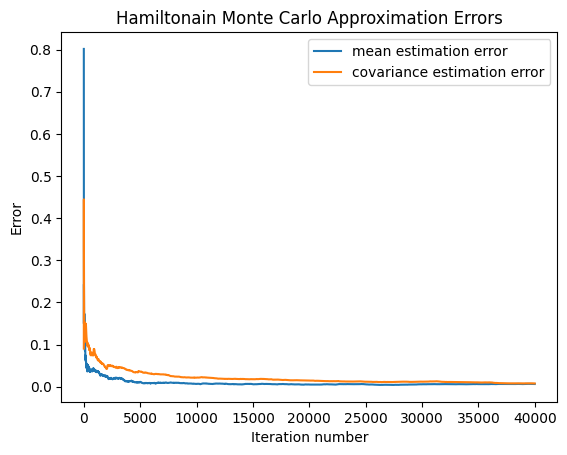

In [17]:
mvn = MVN(tf.constant(large_scale_mean.tolist(),dtype=tf.float32), tf.constant(large_scale_cov.tolist(),dtype=tf.float32))
# print(mvn.getMean(),mvn.getCovariance())
chain_maker = HamiltonianChainMaker(mvn,n=4*10**4,step_size=.1)
print(chain_maker)
plot_chain_errors(large_scale_mean,large_scale_cov,chain_maker.getOutput(),"Hamiltonain Monte Carlo Approximation Errors")

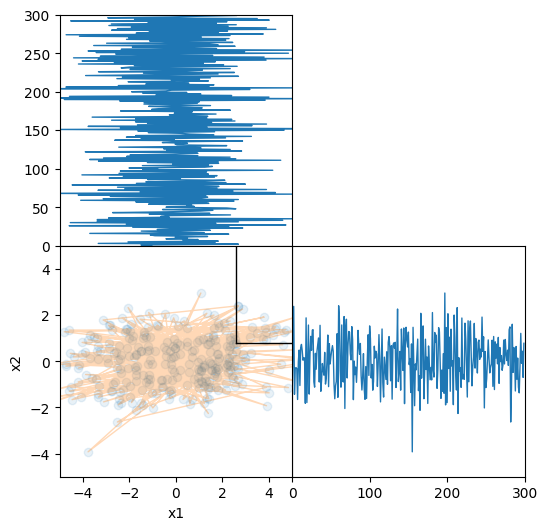

In [ ]:
from HMC.ChainVisualizers import visualize
visualize(chain_maker,"hmc.mp4")

In [ ]:
import numpy as np
from AM.am import AdaptiveMetropolis

def target_distribution(params):
    mean = np.array([0, 0])
    covariance = np.array([[5, 1], [0, 1]])
    inv_covariance = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot(np.dot((params - mean).T, inv_covariance), (params - mean))
    return np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))
        
# Create an instance of AdaptiveMetropolis
initial_params = [0, 0]
sd = 0.1  # Scaling parameter
epsilon = 1.0  # Parameter for the time-dependent covariance structure
t0 = 100  # Time index for transition in covariance structure
iterations = 7000
am_sampler = AdaptiveMetropolis(target_distribution, initial_params, sd, epsilon, t0, iterations)

am_sampler.getOutput()

array([[-1.01008147, -1.06463923],
       [-1.01008147, -1.06463923],
       [ 0.69920444, -0.48616631],
       ...,
       [ 2.60448808, -0.56932027],
       [ 3.23305061, -0.3111587 ],
       [ 2.61724414, -0.52161859]])

In [ ]:
# Calculate and print the mean and variance for each dimension of the samples
mean_of_samples = np.mean(am_sampler.getOutput(), axis=0)
variance_of_samples = np.cov(np.array(am_sampler.getOutput()).T)
print(f"Mean of Samples: {mean_of_samples}")
print(f"Variance of Samples: {variance_of_samples}")

Mean of Samples: [-0.09554559 -0.0320892 ]
Variance of Samples: [[4.53232645 0.53006785]
 [0.53006785 0.99771738]]


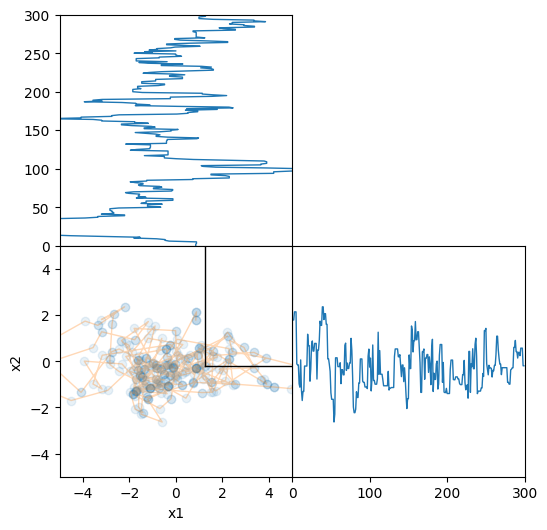

In [ ]:
from HMC.ChainVisualizers import visualize
visualize(am_sampler,"adaptive_metropolis.mp4")

[ 0.50919958 -0.16042945] [[1.14059595 0.78793168]
 [0.78793168 0.90393421]]


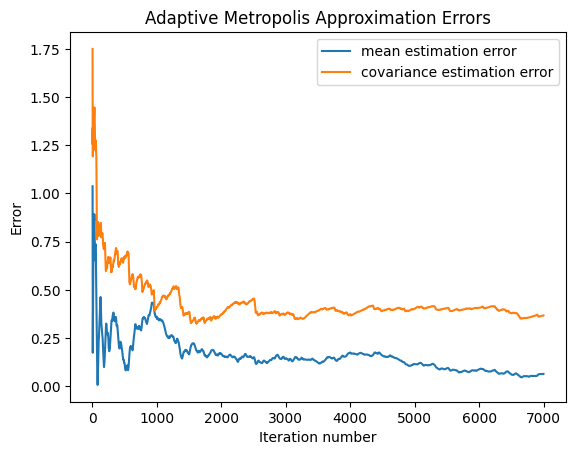

In [ ]:
plot_chain_errors(np.array([0,0]),np.array([[5, 1], [0, 1]]),am_sampler.getOutput(),"Adaptive Metropolis Approximation Errors")

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

In [ ]:

# Two-dimensional target distribution function
def target_distribution(x):
    mean = np.array([0, 0])
    covariance = np.array([[5, 1], [0, 1]])
    inv_covariance = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot((x - mean), np.dot(inv_covariance, (x - mean)))
    return np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))


# Proposal distribution for two-dimensional theta
def proposal_distribution(theta, sigma=0.5):
    return theta + np.random.normal(0, sigma, size=theta.shape)

# Function to compute correction factor
def compute_correction_factor(num_points, sigma):
    def objective(C_sigma):
        convolved = np.convolve(stats.norm.cdf(np.linspace(-3*sigma, 3*sigma, num_points)/sigma), C_sigma, mode='same')
        S = 1 / (1 + np.exp(-np.linspace(-3*sigma, 3*sigma, num_points)))
        return np.sum(np.abs(convolved - S))

    initial_guess = np.ones(num_points) / num_points
    result = minimize(objective, initial_guess, method='SLSQP')
    return np.mean(result.x) if result.success else 1.0

# Function to create correction distribution
def create_correction_distribution_function(average_correction_factor, scale=1):
    def correction_distribution():
        return np.random.normal(average_correction_factor, scale)
    return correction_distribution

# Function to compute statistics (Δ*, sample variance, error)
def compute_statistics(current, proposed, minibatch, target_distribution):
    lambda_values = []
    for x in minibatch:
        current_density = target_distribution(current)
        proposed_density = target_distribution(proposed)
        lambda_value = np.log(proposed_density / current_density)
        lambda_values.append(lambda_value)
    lambda_values = np.array(lambda_values)

    delta_star = np.mean(lambda_values)
    sample_variance = np.var(lambda_values)

    # First and third moments for error estimation
    first_moment = np.mean(np.abs(lambda_values - delta_star))
    third_moment = np.mean(np.abs(lambda_values - delta_star)**3)

    # Error estimate
    error = (6.4 * third_moment / np.sqrt(len(minibatch))) + (2 * first_moment / len(minibatch))
    return delta_star, sample_variance, error


# Minibatch acceptance test function
def minibatch_acceptance_test(current, proposed, minibatch, target_distribution, correction_distribution, delta_threshold, error_tolerance):
    global final_minibatch_size
    delta_star, sample_variance, error = compute_statistics(current, proposed, minibatch, target_distribution)
    while sample_variance >= 1 or error > error_tolerance:
        additional_samples = np.random.choice(data, m, replace=False)
        minibatch = np.concatenate((minibatch, additional_samples))
        delta_star, sample_variance, error = compute_statistics(current, proposed, minibatch, target_distribution)
    final_minibatch_size = len(minibatch)
    X_nc = np.random.normal(0, np.sqrt(1 - sample_variance))
    X_corr = correction_distribution()
    return delta_star + X_nc + X_corr > 0

# MCMC sampling with minibatches for two-dimensional theta
def mcmc_with_minibatch(T, m, delta, correction_distribution, initial_sample, proposal_distribution, target_distribution, data):
    samples = [initial_sample]
    theta = initial_sample
    accepted = 0

    for _ in range(T):
        theta_prime = proposal_distribution(theta)
        minibatch_indices = np.random.choice(len(data), m, replace=False)
        minibatch = data[minibatch_indices]

        if minibatch_acceptance_test(theta, theta_prime, minibatch, target_distribution, correction_distribution, 1, delta):
            theta = theta_prime
            accepted += 1
        samples.append(theta)

    acceptance_rate = accepted / T
    print(f"Acceptance Rate: {acceptance_rate}")
    return samples

# Prepare the dataset and parameters
final_minibatch_size = 0
T = 10000  # Reduced number of samples for speed
m = 50   
iters = T
delta = 0.1  # Error bound
average_correction_factor = compute_correction_factor(num_points=100, sigma=0.5)
correction_distribution = create_correction_distribution_function(average_correction_factor)
initial_sample = np.array([0, 0])  # Starting point in the parameter space
data = np.random.normal(0, 1, (1000, 2))  # Simulated dataset

# Run the Metropolis-Hastings algorithm
samples = mcmc_with_minibatch(iters, m, delta, correction_distribution, initial_sample, proposal_distribution, target_distribution, data)


# Calculate and print the mean and variance for each dimension of the samples
mean_of_samples = np.mean(samples, axis=0)
variance_of_samples = np.cov(np.array(samples).T)
print(f"Mean of Samples: {mean_of_samples}")
print(f"Variance of Samples: {variance_of_samples}")


Acceptance Rate: 0.7028
Mean of Samples: [-0.08852544  0.06050194]
Variance of Samples: [[7.7158435  1.03846885]
 [1.03846885 1.64257278]]


In [ ]:
samples

[array([0, 0]),
 array([ 0.1157987 , -0.30676848]),
 array([ 0.35444572, -0.137657  ]),
 array([ 0.35444572, -0.137657  ]),
 array([ 1.00308602, -0.44525596]),
 array([ 0.99025889, -0.14219208]),
 array([ 0.99025889, -0.14219208]),
 array([ 1.85904966, -0.07666144]),
 array([ 2.06813916, -0.15996488]),
 array([1.75529409, 0.66683718]),
 array([1.75529409, 0.66683718]),
 array([2.74833262, 0.25790122]),
 array([2.25460426, 0.19130659]),
 array([ 2.08565576, -0.72652928]),
 array([ 2.08565576, -0.72652928]),
 array([ 2.32723576, -0.66710223]),
 array([ 1.85186553, -1.30394624]),
 array([ 1.85186553, -1.30394624]),
 array([ 1.68040645, -0.69722603]),
 array([ 1.68040645, -0.69722603]),
 array([ 1.68040645, -0.69722603]),
 array([ 1.68040645, -0.69722603]),
 array([ 1.68040645, -0.69722603]),
 array([ 1.93619353, -0.47699266]),
 array([ 1.70788709, -0.33385384]),
 array([ 1.8024772 , -0.55903673]),
 array([1.52652129, 0.63790081]),
 array([1.23348702, 0.55654849]),
 array([0.32105244, 0.90

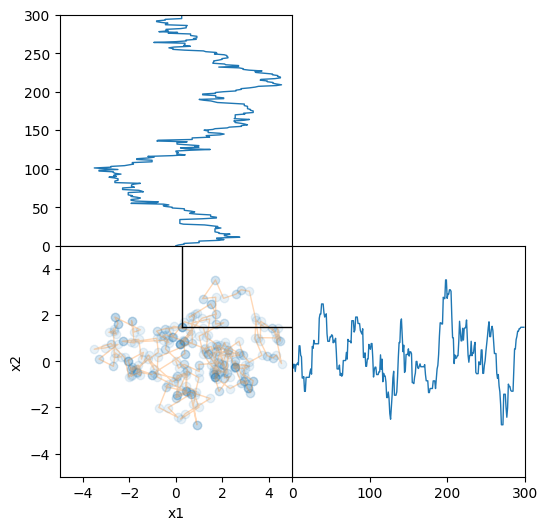

In [ ]:
from HMC.ChainVisualizers import visualize

class MiniBatchChain:
    def __init__(self,samples) -> None:
        self.samples = np.array(samples)

    def getOutput(self):
        return self.samples
minibatch_chain = MiniBatchChain(samples)

visualize(minibatch_chain,"minibatch_metropolis.mp4")

Single Sample: [2.47021837 4.45914635]


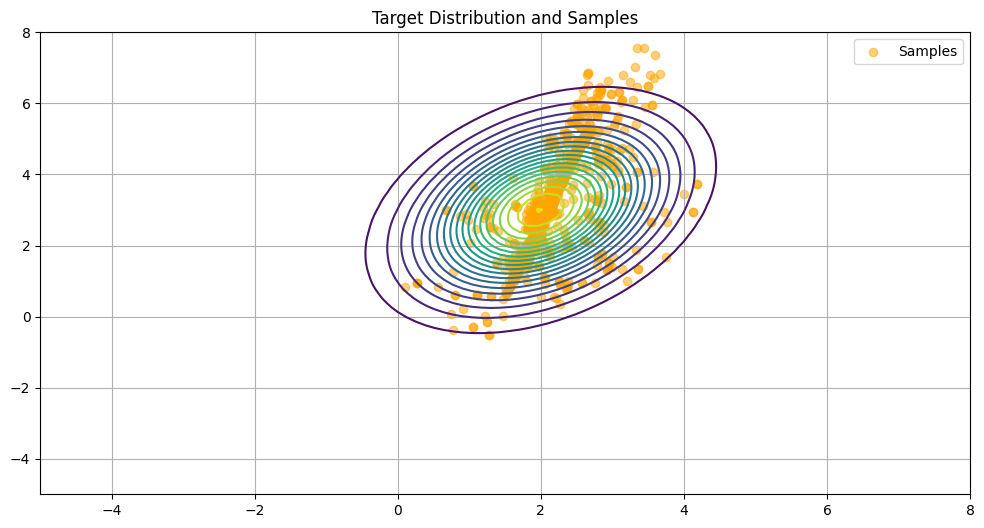

array([[ 0.62931431,  0.04521339],
       [ 1.80433935,  0.33941523],
       [ 0.3281622 , -0.77947478],
       ...,
       [-1.29199555, -0.41532562],
       [-1.44729364, -0.37336227],
       [-1.51569576, -0.3583946 ]])

In [ ]:
from dram import DRAM
import numpy as np
def target_distribution(params):
    mean = np.array([0, 0])
    covariance = np.array([[5, 1], [0, 1]])
    inv_covariance = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot(np.dot((params - mean).T, inv_covariance), (params - mean))
    return np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))
        
# Create an instance of DelayedRejectionMCMC
initial_params = [0, 0]
iterations = 10000
t0 = 100
dram_sampler = DRAM(target_distribution, initial_params, iterations, t0)

dram_sampler.getOutput()

In [ ]:
# Calculate and print the mean and variance for each dimension of the samples
mean_of_samples = np.mean(dram_sampler.getOutput(), axis=0)
variance_of_samples = np.cov(np.array(dram_sampler.getOutput()).T)
print(f"Mean of Samples: {mean_of_samples}")
print(f"Variance of Samples: {variance_of_samples}")

Mean of Samples: [-1.23285504 -0.40204817]
Variance of Samples: [[ 2.11103823 -0.14338997]
 [-0.14338997  0.22969485]]


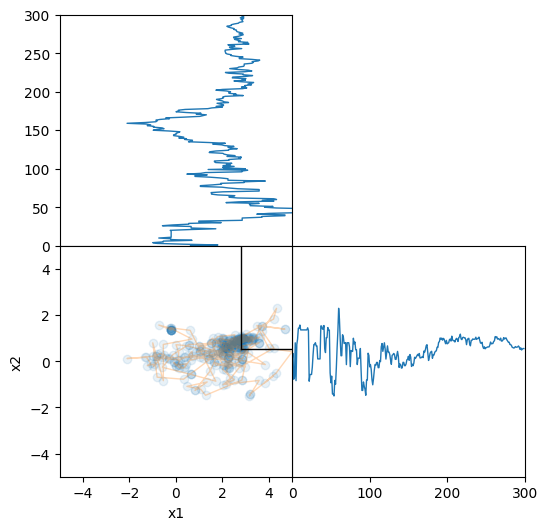

In [ ]:
from HMC.ChainVisualizers import visualize
visualize(dram_sampler,"dram.mp4")